In [167]:
##################################################################
# Brian Lesko 
# 9/7/2023
# Robotics Study, Transformation Matricies, Axes animation
##################################################################

#Scratchwork for 2R robot

# The code to create a virtual environment is: python3 -m venv 2R_Env
# The code to activate the virtual environment is: source 2R_Env/bin/activate
# The code to deactivate the virtual environment is: deactivate
# The libraries to install are: pip install numpy matplotlib streamlit


import numpy as np
import matplotlib.pyplot as plt
import modern_robotics as mr
from matplotlib import style
style.use("ggplot")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

# The link lengths are defined as L1 and L2, or L = [L1 L2]'
L1 = 1
L2 = 1

# The home configuration of a 2R planar robot
p = np.array([[L1+L2], [0], [0]]) # The end effector position in the home configuration
M02 = np.block([[np.eye(3), p], [0, 0, 0, 1]]) # The end effector frame in the home configuration
print(M02), print('')
p = np.array([[L1], [0], [0]]) # The first joint position in the home configuration
M01 = np.block([[np.eye(3), p], [0, 0, 0, 1]]) # The first joint frame in the home configuration
print(M01)

# Screw Axis
# A screw axis is a line about which a rigid body move and rotate it is defined by a unit vector s and a point q that lies on the line 
s1 = np.array([[0], [0], [1], [0], [0], [0]]) 
s2 = np.array([[0], [0], [1], [0], [-L1], [0]])
Slist = np.hstack((s1, s2))

[[1. 0. 0. 2.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

[[1. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


/var/folders/7y/6b82r8j576s0j4p84sz0f5dc0000gn/T/ipykernel_49413/3220220459.py:21: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [168]:
th1 = np.pi/8
# degrees to radians
th2 = np.pi/4

th = np.array([th1, th2]) # The joint angles

# Forward Kinematics
T02 = mr.FKinSpace(M02, Slist, th)
T01 = mr.FKinSpace(M01, s1, [th[0]])

print(T01)
print('')
print(T02)

[[ 0.92387953 -0.38268343  0.          0.92387953]
 [ 0.38268343  0.92387953  0.          0.38268343]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]

[[ 0.38268343 -0.92387953  0.          1.30656296]
 [ 0.92387953  0.38268343  0.          1.30656296]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


[[ 0.38268343 -0.92387953  0.          1.30656296]
 [ 0.92387953  0.38268343  0.          1.30656296]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]
[[ 0.92387953 -0.38268343  0.          0.92387953]
 [ 0.38268343  0.92387953  0.          0.38268343]
 [ 0.          0.          1.          0.        ]
 [ 0.          0.          0.          1.        ]]


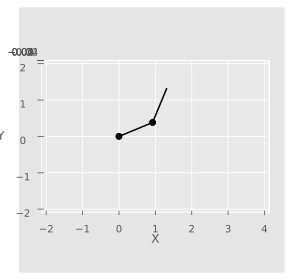

In [169]:
T_list = [T01, T02]

print(T02)

# Create a 3D axes object
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# calculate the joint locations and plot them
ax.plot(0, 0, 0, 'ko')
for i in range(len(T_list)-1):
    # extract the origin of each frame
    T = T_list[i]
    print(T)
    [x, y, z] = T[0:3, 3]
    # plot the origin
    ax.plot(x, y, z, 'ko')

# Plot the links 
for i in range(len(T_list)):
    if i == 0:
        ax.plot([0, T_list[i][0,3]], [0, T_list[i][1,3]], [0, T_list[i][2,3]], 'k-')
    if i > 0:
        ax.plot([T_list[i-1][0,3], T_list[i][0,3]], [T_list[i-1][1,3], T_list[i][1,3]], [T_list[i-1][2,3], T_list[i][2,3]], 'k-')
        

# set the axes limits
ax.set_xlim([-2,4])
ax.set_ylim([-2,2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')
# set the axes ticks to only show integers
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# set the view 
ax.view_init(azim=-90, elev=90)
plt.show()